In [6]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id="a6c61753959f42e5b225cdbdbc7286d3",
    client_secret="793ec34227774e3daeb11bf44460b09f",
    redirect_uri="https://www.spotify.com/",
    scope="playlist-read-private playlist-read-collaborative"
))

In [7]:
playlist_id = "3fLkNQ6NOkQOQRj8Wu9jKI"

results = sp.playlist_items(playlist_id, limit=50)
tracks = results['items']

while results['next']:
    results = sp.next(results)
    tracks.extend(results['items'])

data = []
artist_names = []
release_years = []

for item in tracks:
    track = item['track']
    if track:
        release_date = track['album']['release_date']
        release_year = release_date.split("-")[0]
        data.append({
            'Track Name': track['name'],
            'Artist': ', '.join([artist['name'] for artist in track['artists']]),
            'Album Name': track['album']['name'],
            'Release Date': track['album']['release_date'],
            'Duration (in milliseconds)': track['duration_ms']
        })
        artist_names.extend([artist['name'] for artist in track['artists']])
        release_years.append(release_year)

In [8]:
df = pd.DataFrame(data)

In [11]:
from collections import Counter
from prettytable import PrettyTable

artist_song_count = Counter(artist_names)
release_year_count = Counter(release_years)

artist_df = pd.DataFrame(artist_song_count.items(), columns=['Artist', 'Song Count']).sort_values(by='Song Count', ascending=False)
release_year_df = pd.DataFrame(release_year_count.items(), columns=['Release Year', 'Song Count']).sort_values(by='Release Year', ascending=False)

unique_artists = set(artist_names)

df = pd.DataFrame(data)

sorted_artist_song_count = sorted(artist_song_count.items(), key=lambda x: x[1], reverse=True)
sorted_release_year_count = sorted(release_year_count.items(), key=lambda x: x[0])

# Artist Song Count Table
artist_table = PrettyTable(["Artist", "Song Count"])
for artist, count in sorted_artist_song_count:
    artist_table.add_row([artist, count])

# Release Year Song Count Table
year_table = PrettyTable(["Release Year", "Song Count"])
for year, count in sorted_release_year_count:
    year_table.add_row([year, count])

# Print results
print(f"Total Tracks: {len(tracks)}")
print(f"Count of Unique Artists: {len(artist_song_count)}")

print("\nSong Count by Artist")
print(artist_table)

print("\nSongs Count by Release Year")
print(year_table)


Total Tracks: 23
Count of Unique Artists: 20

Song Count by Artist
+-------------------------------------+------------+
|                Artist               | Song Count |
+-------------------------------------+------------+
|               NCT 127               |     5      |
|                 BoA                 |     2      |
|                TVXQ!                |     2      |
|            Britney Spears           |     2      |
|                 EXO                 |     1      |
|                SHINee               |     1      |
|              Red Velvet             |     1      |
|                 ONEW                |     1      |
|                Endor                |     1      |
|            Chappell Roan            |     1      |
|           André De Shields          |     1      |
| Hadestown Original Broadway Company |     1      |
|            Anaïs Mitchell           |     1      |
|               EXO-CBX               |     1      |
|                U-KNOW         

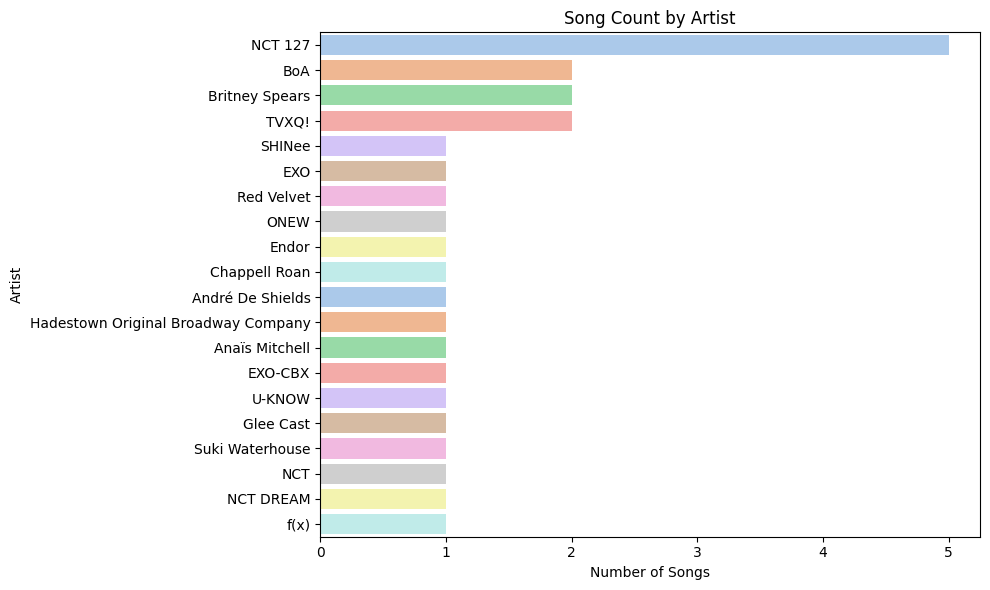

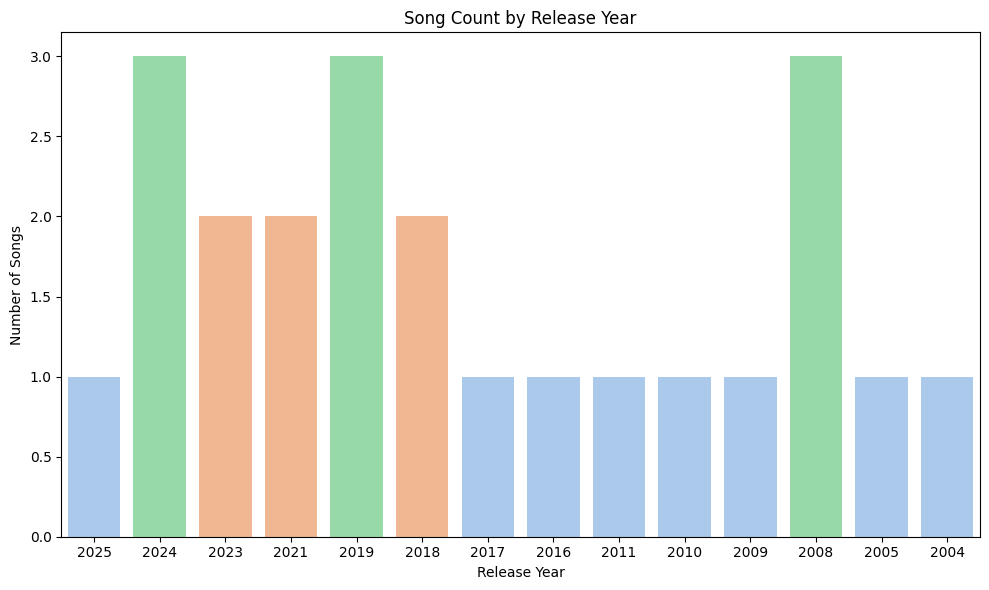

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

# Plot Artist Song Count
plt.figure(figsize=(10, 6))
sns.barplot(x='Song Count', y='Artist', data=artist_df, hue='Artist', palette='pastel', legend=False)
plt.title('Song Count by Artist')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

# Plot Songs by Release Year
plt.figure(figsize=(10, 6))
sns.barplot(x='Release Year', y='Song Count', data=release_year_df, hue='Song Count',palette='pastel', legend=False)
plt.title('Song Count by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.tight_layout()
plt.show()